# Taylor Swift Channel EDA

## Step 0: Import libraries

In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Step 1: Prepare Data

In [41]:
FILE_NAME = 'data.csv'
df = pd.read_csv(FILE_NAME)

### Convert data types

In [42]:
df['published_date'] = pd.to_datetime(df['published_date'])
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')

### Replace null values by empty strings

In [43]:
df['description'] = df['description'].fillna('')

### Replace nan values by median values

In [44]:
likes_median = df['likes'].median()
df['likes'] = df['likes'].fillna(likes_median)

### Understanding this dataset

In [46]:
df.shape # To show (rows, columns)

(578, 8)

#### Show first 5 rows

In [47]:
df.head()

,id,published_date,title,description,likes,views,comments,is_short
0,PQTA-EVc5DI,2024-07-09,Taylor Swift - Fortnight (feat. Post Malone) (...,"""Fortnight (feat. Post Malone) (Cults Remix)"" ...",29468.0,761740,4802,False
1,HZIg5sQrPAM,2024-07-09,Taylor Swift - Fortnight (feat. Post Malone) (...,"""Fortnight (feat. Post Malone) (Acoustic)"" by ...",77849.0,1436971,5127,False
2,0GQ_QeZxdzo,2024-06-21,Taylor Swift - Fortnight (feat. Post Malone) (...,"Go behind the scenes of the ""Fortnight (feat. ...",158859.0,2562912,7569,False
3,KJXP13hqf2I,2024-05-22,Taylor Swift - Fortnight (feat Post Malone) (B...,"Listen to ""Fortnight (feat Post Malone) (BLOND...",70921.0,1935889,7192,False
4,ZwlBxvnH-So,2024-05-03,A fortnight since TTPD 🤍 brought to you by You...,,1364453.0,30713860,16262,True


#### Show attributes

In [48]:
df.columns

Index(['id', 'published_date', 'title', 'description', 'likes', 'views',
       'comments', 'is_short'],
      dtype='object')

In [49]:
df.describe()

,published_date,likes,views,comments
count,578,5.780000e+02,5.780000e+02,578.000000
mean,2018-04-08 23:35:05.190311424,5.010968e+05,5.232662e+07,20136.425606
min,2008-06-26 00:00:00,6.200000e+01,0.000000e+00,0.000000
25%,2013-02-05 00:00:00,2.950750e+04,1.192253e+06,1475.500000
50%,2020-02-03 12:00:00,1.314630e+05,5.147005e+06,3806.500000
75%,2022-10-22 00:00:00,2.878105e+05,1.701563e+07,8930.500000
max,2024-07-09 00:00:00,1.575415e+07,3.471313e+09,756152.000000
std,NaN,1.448378e+06,2.505565e+08,67224.756448


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              578 non-null    object        
 1   published_date  578 non-null    datetime64[ns]
 2   title           578 non-null    object        
 3   description     578 non-null    object        
 4   likes           578 non-null    float64       
 5   views           578 non-null    int64         
 6   comments        578 non-null    int64         
 7   is_short        578 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 32.3+ KB


#### Check Null values

In [51]:
df.isnull().sum()

id                0
published_date    0
title             0
description       0
likes             0
views             0
comments          0
is_short          0
dtype: int64

#### Check for duplicates

In [52]:
df.nunique()

id                578
published_date    272
title             574
description       446
likes             576
views             577
comments          563
is_short            2
dtype: int64

In [53]:
# Check for rows with full duplicate
df.duplicated().sum()

0

## Step 2: Distinguish Attributes

In [67]:
identifier = ['id']
temporal = ['published_date']
numerical = ['views', 'likes', 'comments']
categorical = ['is_short']
textual = ['title', 'description']

## Step 3: Univariate Analysis

#### Import the ProfileReport class from the ydata_profiling library

In [64]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)

In [65]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

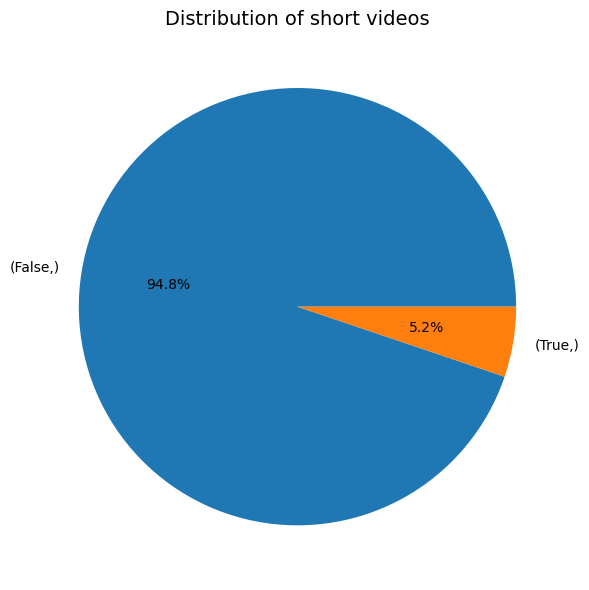

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))

df[categorical].value_counts(dropna=False).plot(
    kind='pie', 
    autopct='%1.1f%%',
    ax=ax
)

ax.set_title('Distribution of short videos', fontsize=14)
ax.set_ylabel('')

plt.tight_layout()
plt.show()